# Aufgabe 1: Generische Rangordnungsoperatoren
Eine weitere Klasse von Bildoperatoren wird als *Rangordnungsoperatoren* bezeichnet.
Dabei wird ähnlich zur Faltung im Ortsbereich ein Fenster über das Bild geschoben.
Im Gegensatz zum linearen Filtern werden jedoch die Pixel nach Grauwerten sortiert und im Folgenden die aus dieser Ordnung resultierenden Ränge betrachtet.

Implementieren Sie die Rangordnungsoperatoren *Minimum-*, *{Maximum-* und *Medianfilter*, die für den aktuell betrachteten Pixel jeweils den ersten, letzten oder mittleren Wert der sortierten Folge setzen. Testen sie verschiedene Maskengrößen $w\times w$, mit $w \in \{3,5,\dots\}$ und interpretieren sie die Ergebnisse!
Was bewirken die Filter jeweils?

## 0. Pfade, Pakete etc.

In [1]:
import glob
import urllib.request

%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import imageio
import numpy as np
import math

In [2]:
# image_filter = 'Bilder/*.jpg'
# image_filter = 'Bilder/Aerial.jpg'
image_filter = 'Bilder/SEM.jpg'

## 1. Definition des Filters
Zuerst wird die Größe der Maske $w$ definiert.

In [3]:
w = 3

Definieren Sie nun die Filter als Funktionen `max_filter`, `min_filter`, `median_filter` der sortierten Folge $f$. Können diese platzsparend als Lambda-Ausdruck definiert werden?

In [4]:
# min_filter = lambda g: np.min(g)
# max_filter = lambda g: np.max(g)
# median_filter = lambda g: np.median(g)

min_filter = lambda g: sorted(np.array(g).flatten().tolist())[0]
max_filter = lambda g: sorted(np.array(g).flatten().tolist())[g.shape[0]**2-1]
median_filter = lambda g: sorted(np.array(g).flatten().tolist())[(g.shape[0]**2+1)//2-1]

## 2. Laden des Bildes

In [5]:
image_path = np.random.choice(glob.glob(image_filter))
image = imageio.imread(image_path)
image

Image([[ 26,  26,  26, ...,   6,   4,   3],
       [ 26,  26,  26, ...,   6,   3,   1],
       [ 26,  26,  26, ...,   4,   1,   0],
       ...,
       [203, 194, 179, ...,   0,   0,   0],
       [199, 207, 207, ...,   0,   0,   0],
       [168, 175, 179, ...,   0,   0,   0]], dtype=uint8)

Für diese Aufgabe ist es wichtig, das Bild im Fließkommaformat vorliegen zu haben. Andernfalls kann der Median nicht immer korrekt berechet werden. Konvertieren sie `image` zu einer geeigneten Repräsentation:

In [6]:
image=image.astype(float)
image

Image([[ 26.,  26.,  26., ...,   6.,   4.,   3.],
       [ 26.,  26.,  26., ...,   6.,   3.,   1.],
       [ 26.,  26.,  26., ...,   4.,   1.,   0.],
       ...,
       [203., 194., 179., ...,   0.,   0.,   0.],
       [199., 207., 207., ...,   0.,   0.,   0.],
       [168., 175., 179., ...,   0.,   0.,   0.]])

## 3. Verrauschen des Bildes
Um ein realistisches Szenario zu simulieren, wird das Bild nun mit Salt-and-Pepper-Rauschen versehen:

In [7]:
image_noisy = np.copy(image)
for _ in range(100):
    index = tuple([np.random.randint(0,i) for i in image.shape])
    image_noisy[index] = np.random.choice([0.0,1.0])
image_noisy

array([[ 26.,  26.,  26., ...,   6.,   4.,   3.],
       [ 26.,  26.,  26., ...,   6.,   3.,   1.],
       [ 26.,  26.,  26., ...,   4.,   1.,   0.],
       ...,
       [203., 194., 179., ...,   0.,   0.,   0.],
       [199., 207., 207., ...,   0.,   0.,   0.],
       [168., 175., 179., ...,   0.,   0.,   0.]])

## 4. Berechung des Filters
Definieren Sie eine Funktion `ex4_rank_filter`, die ein Bild sowie einen Rangordnungsfilter übergeben bekommt und als Rückgabewert das gefilterte Bild liefert.

In [8]:
def ex4_rank_filter(image, rank_filter):
    filtered_image = np.zeros_like(image)    
    image_rows,image_cols = image.shape
    
    fil_rows=fil_cols = w
    fil_half_rows=fil_rows//2
    fil_half_col=fil_cols//2
    img=np.pad(image,((fil_half_rows,fil_half_rows),(fil_half_col,fil_half_col)),'edge')
    
    for i in range(image_rows):
        for j in range (image_cols):
            filtered_image[i][j]=rank_filter(img[i:i+fil_rows,j:j+fil_cols])
           
    return filtered_image

Nun wird das gefilterte Bild mit Hilfe der Funktion berechnet:

In [9]:
med_filtered_image3 = ex4_rank_filter(image_noisy, median_filter)
min_filtered_image3 = ex4_rank_filter(image_noisy, min_filter)
max_filtered_image3 = ex4_rank_filter(image_noisy, max_filter)

w=5
med_filtered_image5 = ex4_rank_filter(image_noisy, median_filter)
min_filtered_image5 = ex4_rank_filter(image_noisy, min_filter)
max_filtered_image5 = ex4_rank_filter(image_noisy, max_filter)

## 5. Darstellung
Um die Wirksamkeit des Rangordnungsoperators zu überprüfen, stellen Sie `image`, `image_noisy` und `filtered_image` nebeneinander dar:

<IPython.core.display.Javascript object>


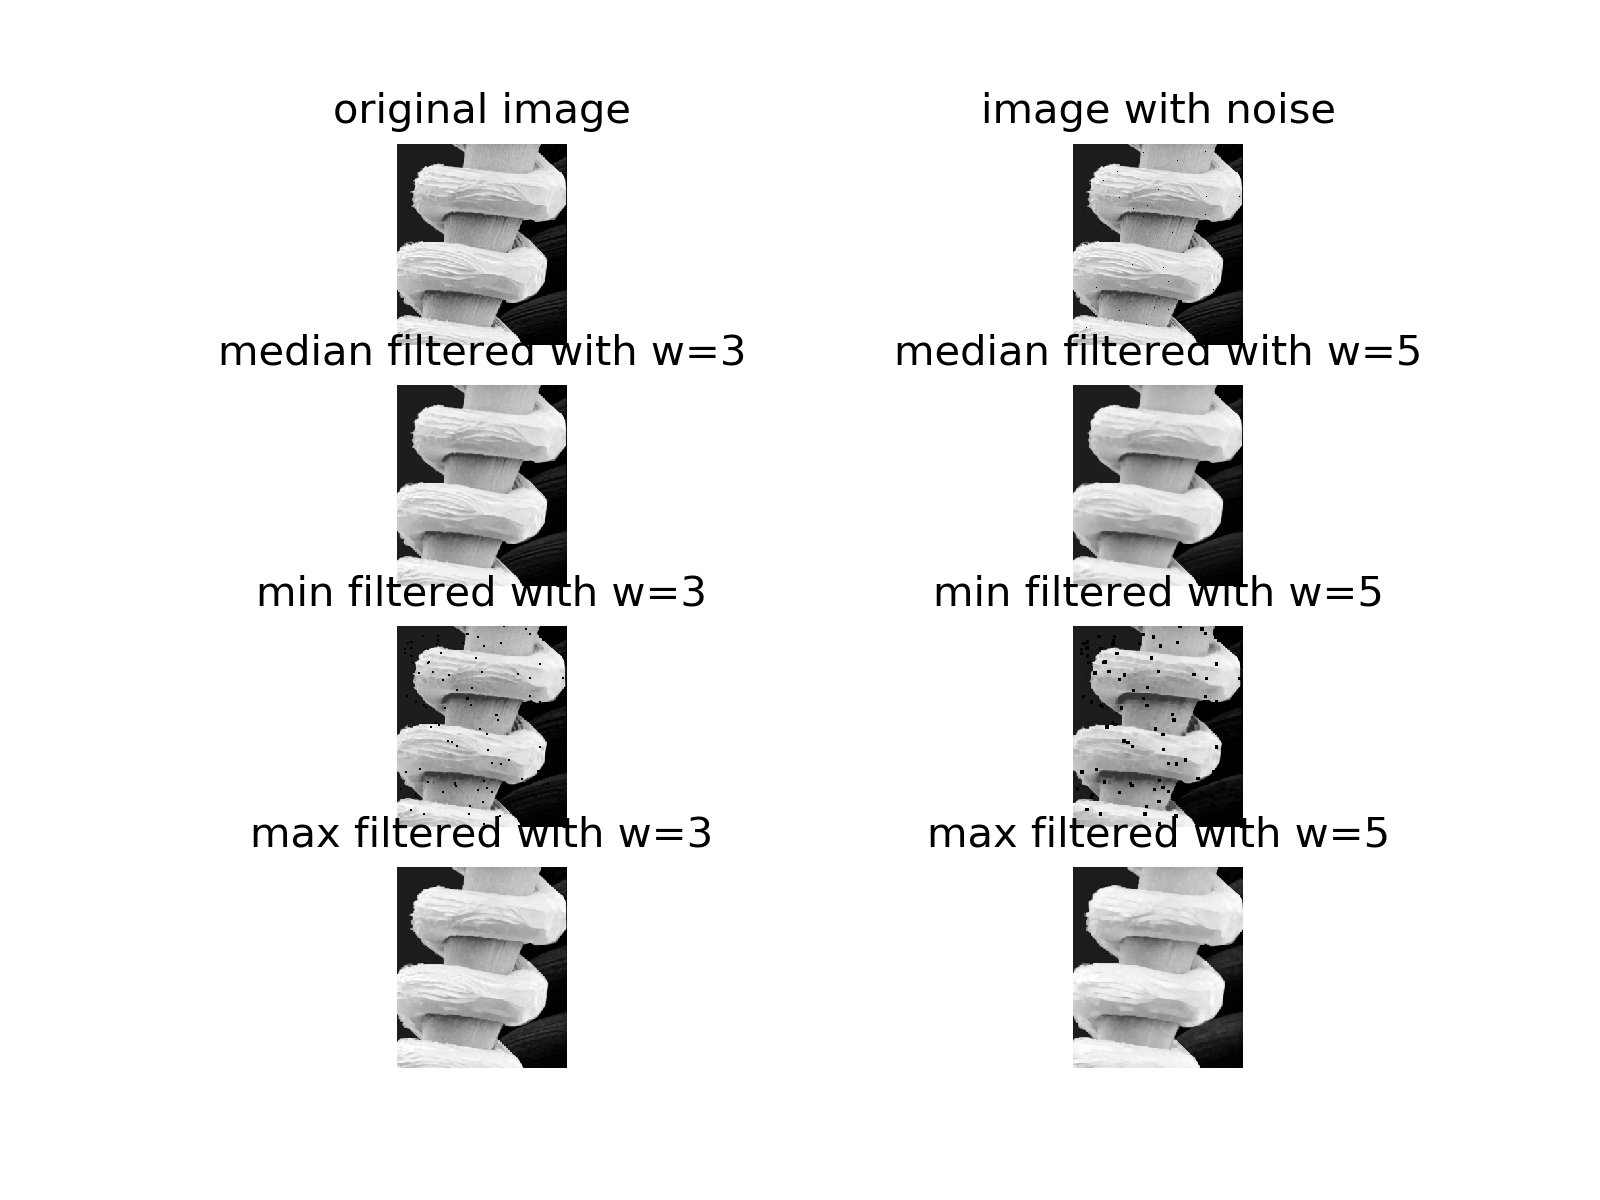

In [10]:
plt.figure('Image')

plt.subplot(4,2,1)
plt.title('original image')
plt.axis('off')
plt.imshow(image, cmap='gray')

plt.subplot(4,2,2)
plt.title('image with noise')
plt.axis('off')
plt.imshow(image_noisy, cmap='gray')

plt.subplot(4,2,3)
plt.title('median filtered with w=3')
plt.axis('off')
plt.imshow(med_filtered_image3, cmap='gray')

plt.subplot(4,2,4)
plt.title('median filtered with w=5')
plt.axis('off')
plt.imshow(med_filtered_image5, cmap='gray')

plt.subplot(4,2,5)
plt.title('min filtered with w=3')
plt.axis('off')
plt.imshow(min_filtered_image3, cmap='gray')

plt.subplot(4,2,6)
plt.title('min filtered with w=5')
plt.axis('off')
plt.imshow(min_filtered_image5, cmap='gray')

plt.subplot(4,2,7)
plt.title('max filtered with w=3')
plt.axis('off')
plt.imshow(max_filtered_image3, cmap='gray')

plt.subplot(4,2,8)
plt.title('max filtered with w=5')
plt.axis('off')
plt.imshow(max_filtered_image5, cmap='gray')

plt.show()